In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUMBERS1 = np.random.uniform(0,1, 10_000)
NUMBERS2 = np.random.uniform(0,1, 10_000)

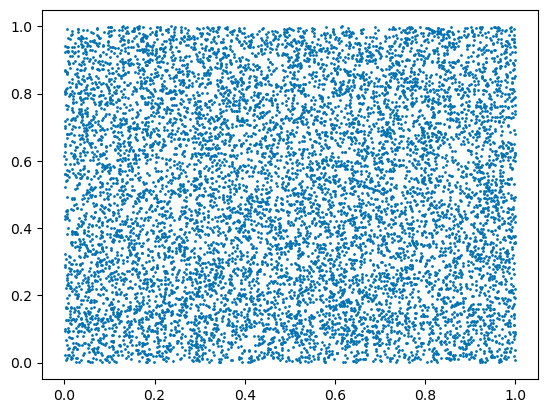

In [ ]:
# plt.plot(NUMBERS)
# plt.hist(NUMBERS, bins=100)

plt.scatter(NUMBERS1, NUMBERS2, s=1)

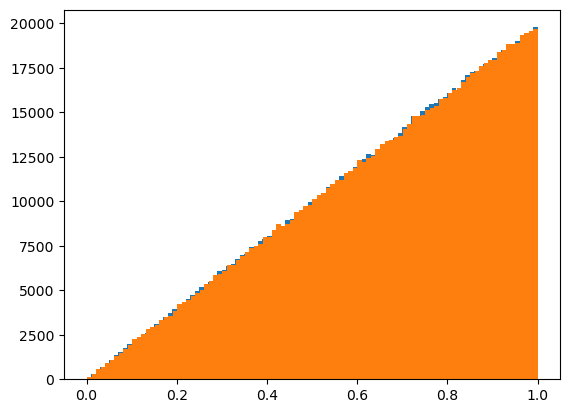

In [4]:
numbers = np.random.uniform(0,1, size=(1_000_000, 2))
BINS = 100
plt.hist(np.max(numbers, axis = 1), bins = BINS)
plt.hist(np.sqrt(numbers[:, 0]), bins = BINS);

In [5]:
from numba import njit, prange

In [ ]:
@njit

def monte_carlo_circle(
    CIRCLE_RADIUS = 1,
    NR_OF_LOOPS = 10,
    NR_OF_POINTS = 1_000_000 #Must be even
):


    mask_sums = 0
    for i in prange(NR_OF_LOOPS):
        np.random.seed(i) #For reproducibility
        points = np.random.uniform(-CIRCLE_RADIUS, CIRCLE_RADIUS, size=NR_OF_POINTS)
        mask = points[int(NR_OF_POINTS/2):]**2 + points[:int(NR_OF_POINTS/2)]**2 < CIRCLE_RADIUS**2
        mask_sums += np.sum(mask)
        print("Loop:", i)
    return 4*2*mask_sums/(NR_OF_POINTS*NR_OF_LOOPS)


In [7]:
# area = 4*2*sum(mask_sums)/(NR_OF_POINTS*NR_OF_LOOPS)
NR_OF_LOOPS = 120
NR_OF_POINTS = 100_000_000
area = monte_carlo_circle(NR_OF_LOOPS=NR_OF_LOOPS, NR_OF_POINTS=NR_OF_POINTS)
print("Calculated area: ", area, ". Total nr of points: ", format(NR_OF_POINTS*NR_OF_LOOPS, ","))

Calculated area:  3.141596892 . Total nr of points:  12,000,000,000


In [33]:
@njit

def monte_carlo_circle_seperate(
    CIRCLE_RADIUS = 1,
    NR_OF_LOOPS = 10,
    NR_OF_POINTS = 1_000_000 #Must be even
):


    # mask_sums = 0
    areas = {}
    for i in prange(NR_OF_LOOPS):
        np.random.seed(i) #For reproducibility
        points = np.random.uniform(-CIRCLE_RADIUS, CIRCLE_RADIUS, size=NR_OF_POINTS)
        mask = points[int(NR_OF_POINTS/2):]**2 + points[:int(NR_OF_POINTS/2)]**2 < CIRCLE_RADIUS**2
        # mask_sums += np.sum(mask)
        # print("Loop:", i)
        areas[i] = 4*2*np.sum(mask)/(NR_OF_POINTS)*CIRCLE_RADIUS**2
    return areas


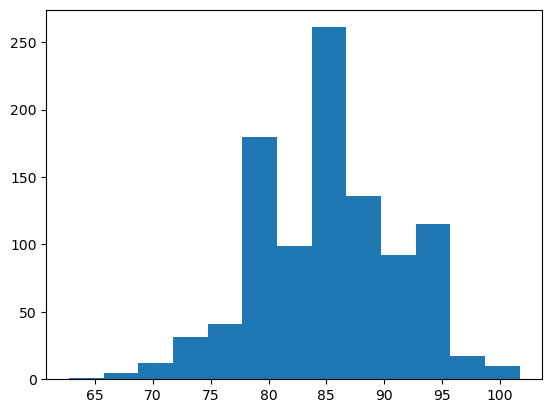

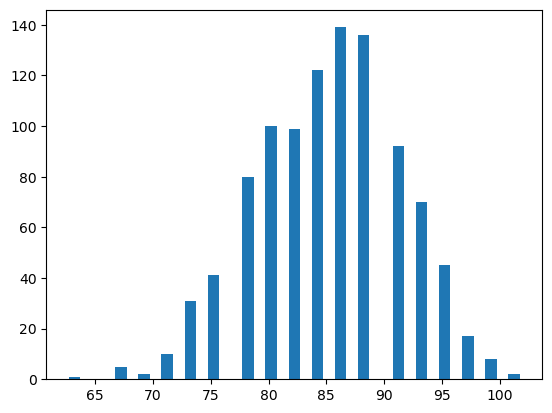

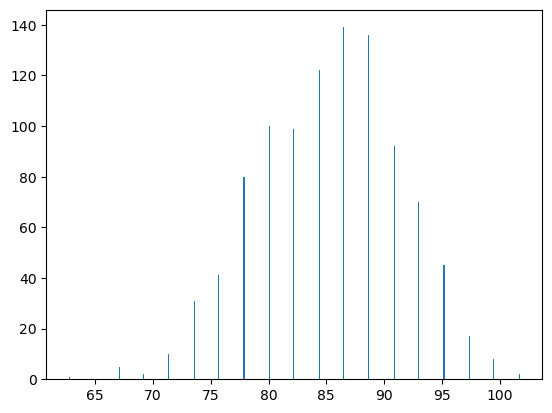

In [40]:
NR_OF_LOOPS = 1000
NR_OF_POINTS = 100
area = monte_carlo_circle_seperate(CIRCLE_RADIUS= 5.2, NR_OF_LOOPS=NR_OF_LOOPS, NR_OF_POINTS=NR_OF_POINTS)
for binwidth in [3, 1, 0.1]:
    plt.hist(list(area.values()), bins=np.arange(min(area.values()), max(area.values()) + binwidth, binwidth))
    plt.show()

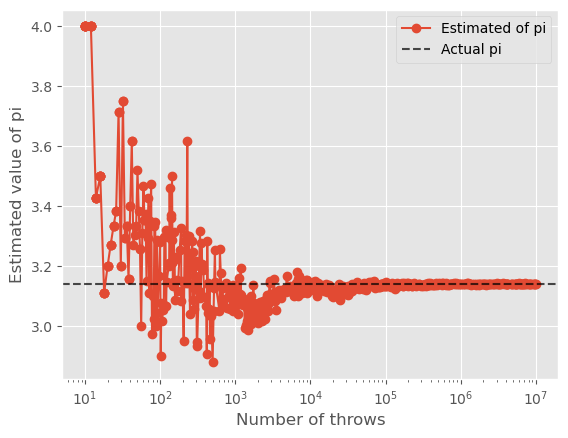

In [65]:
NR_OF_LOOPS = 1
throws = np.logspace(1, 7, num=1000, dtype=int)
throws = [t for t in throws if t%2 == 0]
pies  = []
for NR_OF_POINTS in throws:
    pies.append(monte_carlo_circle(CIRCLE_RADIUS= 5.2, NR_OF_LOOPS=NR_OF_LOOPS, NR_OF_POINTS=NR_OF_POINTS))
    
plt.style.use('ggplot')

fig, ax = plt.subplots()
#log scale x
ax.set_xscale('log')
plt.plot(throws, pies, marker='o', label = "Estimated of pi")
plt.axhline(y=np.pi, color = "black", linestyle='--', alpha = 0.7, label = "Actual pi")
plt.xlabel("Number of throws")
plt.ylabel("Estimated value of pi")
# plt.title("Monte Carlo estimation of pi")
plt.legend()
plt.show()
